In [1]:
from ast import arg
from rdflib import Graph, RDFS, RDF, URIRef, Namespace, Literal, XSD
from owlrl import DeductiveClosure, RDFS_Semantics
import random, sys
import sys
import os
import pandas as pd
from string import Template
import re
import json

In [47]:
g1 = Graph()
g1.parse("/Users/andreea.giurgiu/Desktop/KG-tutorials-master/data/untitled-ontology-51 (2) copy.ttl")
print(len(g1))
g2 = Graph()
g2.parse("/Users/andreea.giurgiu/Desktop/KG-tutorials-master/data/merged_individuals_updated_v2 (1).ttl")
print(len(g2))
g = g1 + g2
print(len(g))


1150
3861
4535


In [48]:
def get_scenario_instances(graph):
    res = graph.query("""
        SELECT DISTINCT ?s ?label ?capability ?ethics ?interaction ?processingTask ?interactionTask WHERE {
            ?s rdf:type <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Scenario> .

            OPTIONAL { ?s <http://www.w3.org/2000/01/rdf-schema#label> ?label . }
            OPTIONAL { ?s <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/capability> ?capability . }
            OPTIONAL { ?s <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasEthicalConsideration> ?ethics . }
            OPTIONAL { ?s <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasInteraction> ?interaction . }
            OPTIONAL { ?s <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/processingTask> ?processingTask . }
            OPTIONAL { ?s <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/interactionTask> ?interactionTask . }
        }
    """, initNs={
        'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#'
    })

    return list(res)

In [44]:
get_scenario_instances(g)

[(rdflib.term.URIRef('http://webprotege.stanford.edu/R7swN5LhTM69khGAOnY03pn'),
  rdflib.term.Literal('Scenario_PrivacyViolation', lang='en'),
  None,
  None,
  rdflib.term.URIRef('http://webprotege.stanford.edu/RDHVgBqecoBlXFKvUsMFTPu'),
  None,
  None),
 (rdflib.term.URIRef('http://webprotege.stanford.edu/R8IHt3CvDHikYNL3A5kSo7s'),
  rdflib.term.Literal('Scenario_QA_Assistance', lang='en'),
  rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Transparency'),
  None,
  rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Question-Answering'),
  None,
  None),
 (rdflib.term.URIRef('http://webprotege.stanford.edu/R8PtgDIh3PhF7UVyyhlTnpW'),
  rdflib.term.Literal('Scenario_TrustCalibration', lang='en'),
  None,
  rdflib.term.URIRef('http://webprotege.stanford.edu/R7WivB5O3CgSGkUWI5zHduF'),
  None,
  rdflib.term.URIRef('http://webprotege.stanford.edu/R9r0qnKRlabyp5CxFs8ePqw'),
  None),
 (rdflib.term.URIRef('h

In [49]:
def count_instances_by_class(graph):
    res = graph.query("""
        SELECT ?class (COUNT(?instance) AS ?count) WHERE {
            ?instance rdf:type ?class .
            FILTER(STRSTARTS(STR(?instance), "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51"))
        }
        GROUP BY ?class
        ORDER BY DESC(?count)
    """, initNs={
        'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#'
    })

    return list(res)


In [50]:
count_instances_by_class(g)

[(rdflib.term.URIRef('http://www.w3.org/2002/07/owl#NamedIndividual'),
  rdflib.term.Literal('290', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'),
  rdflib.term.Literal('85', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/ProcessingTask'),
  rdflib.term.Literal('57', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Capability'),
  rdflib.term.Literal('53', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Domain'),
  rdflib.term.Literal('47', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.URIRef('htt

In [55]:
def scenario_and_ethics_labels(graph):
    res = graph.query("""
        SELECT DISTINCT ?scenarioLabel ?ethicsLabel WHERE {
            ?scenario rdf:type <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Scenario> .
            ?scenario <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasEthicalConsideration> ?ethics .
            OPTIONAL { ?scenario rdfs:label ?scenarioLabel . }
            OPTIONAL { ?ethics rdfs:label ?ethicsLabel . }
        }
    """, initNs={
        'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
        'rdfs': 'http://www.w3.org/2000/01/rdf-schema#'
    })

    return list(res)


In [56]:
scenario_and_ethics_labels(g)

[(rdflib.term.Literal('Scenario_HabitFormation', lang='en'),
  rdflib.term.Literal('Privacy_Management', lang='en')),
 (rdflib.term.Literal('Scenario_PrivacyDecisionOptimization', lang='en'),
  rdflib.term.Literal('Privacy_Management', lang='en')),
 (rdflib.term.Literal('Scenario_EmergencyResponse', lang='en'),
  rdflib.term.Literal('Privacy_Management', lang='en')),
 (rdflib.term.Literal('Scenario_TrustCalibration', lang='en'),
  rdflib.term.Literal('Privacy_Management', lang='en')),
 (rdflib.term.Literal('Scenario_AIDecisionSupport', lang='en'),
  rdflib.term.Literal('Privacy_Management', lang='en')),
 (rdflib.term.Literal('Scenario_PrivacyConflictResolution', lang='en'),
  rdflib.term.Literal('Privacy_Management', lang='en')),
 (rdflib.term.Literal('Indoor Police Intervention'),
  rdflib.term.Literal('Privacy Concerns')),
 (rdflib.term.Literal('Indoor Police Intervention'),
  rdflib.term.Literal('Data Safety')),
 (rdflib.term.Literal('Value-Aware Active Learning Scenario'), None),
 

### Count Classes and Properties

In [57]:
def count_classes_and_properties(graph):
    res = graph.query("""
        SELECT (COUNT(DISTINCT ?class) AS ?classCount) (COUNT(DISTINCT ?property) AS ?propertyCount) WHERE {
            {
                ?class a owl:Class .
            }
            UNION
            {
                ?property a owl:ObjectProperty .
            }
            UNION
            {
                ?property a owl:DatatypeProperty .
            }
        }
    """, initNs={
        'owl': 'http://www.w3.org/2002/07/owl#'
    })
    return list(res)


count_classes_and_properties(g)

[(rdflib.term.Literal('180', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),
  rdflib.term.Literal('146', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))]

 ### List Properties Used by the Actor Class

In [59]:
def actor_properties(graph):
    res = graph.query("""
        SELECT DISTINCT ?property WHERE {
            {
                ?property rdfs:domain <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Actor> .
            }
            UNION {
                ?actor a <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Actor> ;
                        ?property ?object .
            }
        }
    """, initNs={
        'rdfs': 'http://www.w3.org/2000/01/rdf-schema#'
    })
    return list(res)
actor_properties(g)

[(rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/processingInformation'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/IsCommittedTo'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasSocialCommitment'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/capability'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasBias'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/evaluatedBy'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/participatesIn'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasEndgoal'),),
 (rdflib.term.URIRef('http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-onto

### Scenario with the Most Properties (most predicates)

In [63]:
def scenario_with_most_properties(graph):
    res = graph.query("""
        SELECT ?scenarioLabel (COUNT(?p) AS ?propertyCount) WHERE {
            ?scenario a <http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Scenario> .
            ?scenario ?p ?o .
            OPTIONAL { ?scenario rdfs:label ?scenarioLabel . }
        }
        GROUP BY ?scenarioLabel
        ORDER BY DESC(?propertyCount)
        LIMIT 3
    """, initNs={
        'rdfs': 'http://www.w3.org/2000/01/rdf-schema#'
    })
    return list(res)

scenario_with_most_properties(g)

[(None,
  rdflib.term.Literal('35', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.Literal('Scenario_EmergencyResponse', lang='en'),
  rdflib.term.Literal('12', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.Literal('Scenario_PrivacyDecisionOptimization', lang='en'),
  rdflib.term.Literal('11', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))]

### Most Common Property per Class

In [66]:
def properties_per_class_distribution(graph):
    res = graph.query("""
        SELECT ?class ?property (COUNT(?property) AS ?usageCount) WHERE {
            ?instance a ?class .
            ?instance ?property ?o .
            FILTER(STRSTARTS(STR(?instance), "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51"))
        }
        GROUP BY ?class ?property
        ORDER BY ?class DESC(?usageCount)
    """)
    return list(res)
properties_per_class_distribution(g)

[(rdflib.term.BNode('nd74e8e87b3444c46aecf495776a85a0eb58'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.Literal('5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.BNode('nd74e8e87b3444c46aecf495776a85a0eb59'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.Literal('5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.BNode('nd74e8e87b3444c46aecf495776a85a0eb59'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'),
  rdflib.term.Literal('1', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.BNode('nf165629bf5e441d0ba2e0e03f4bd5c9eb6'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.Literal('5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer'))),
 (rdflib.term.BNode('nf165629bf5e441d0ba2e0e03f4bd5c9eb7'),


## KG Measuraments


In [67]:
from rdflib import RDF, OWL

def basic_kg_measures(g):
    # 1. Number of classes
    classes = set(g.subjects(RDF.type, OWL.Class))
    
    # 2. Number of properties (both object and datatype)
    object_properties = set(g.subjects(RDF.type, OWL.ObjectProperty))
    datatype_properties = set(g.subjects(RDF.type, OWL.DatatypeProperty))
    all_properties = object_properties.union(datatype_properties)

    # 3. Number of individuals (instances)
    individuals = set()
    for s, p, o in g.triples((None, RDF.type, None)):
        if o not in [OWL.Class, OWL.ObjectProperty, OWL.DatatypeProperty]:
            individuals.add(s)

    # 4. Number of triples
    triple_count = len(g)

    # 5. Number of unique entities that appear in the subject position
    entities = set(g.subjects())

    return {
        "Number of Classes": len(classes),
        "Number of Properties": len(all_properties),
        "Number of Individuals": len(individuals),
        "Number of Triples": triple_count,
        "Number of Entities (subjects)": len(entities)
    }

metrics = basic_kg_measures(g)
for k, v in metrics.items():
    print(f"{k}: {v}")

Number of Classes: 180
Number of Properties: 146
Number of Individuals: 1136
Number of Triples: 4535
Number of Entities (subjects): 1476


### RDF -> NetworkX => Clean

Nodes: 2127
Edges: 4152


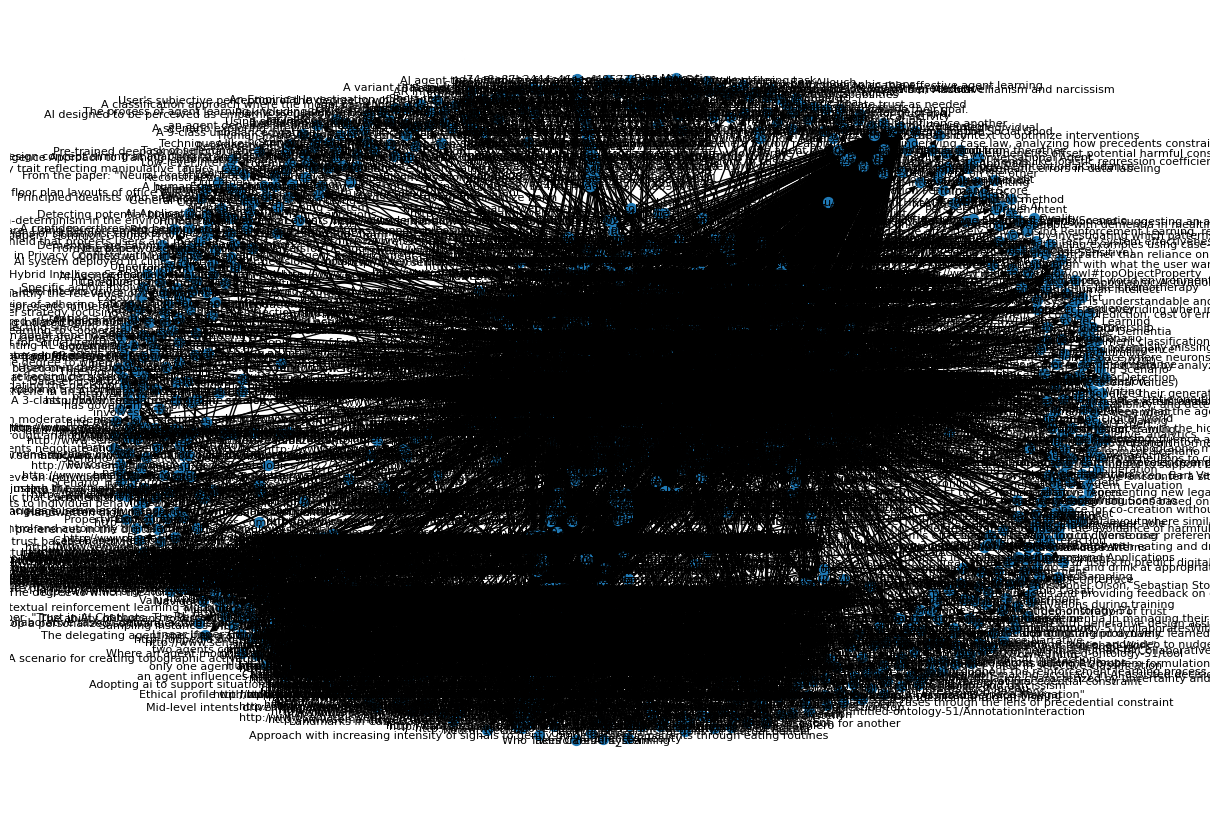

In [72]:
from rdflib import RDF, RDFS, OWL, Graph
from rdflib.namespace import Namespace
import networkx as nx
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph


from rdflib import RDF, RDFS, OWL, Graph

def filter_graph(g):
    cleaned_graph = Graph()

    # Keep rdf:type and rdfs:subClassOf
    valid_predicates = {RDF.type, RDFS.subClassOf}

    # Define predicates to remove (restrictions, domain/range, etc.)
    to_remove_predicates = {
        OWL.onProperty, OWL.someValuesFrom, OWL.allValuesFrom,
        OWL.cardinality, OWL.minCardinality, OWL.maxCardinality, OWL.hasValue,
        OWL.Restriction, RDFS.domain, RDFS.range
    }

    for s, p, o in g:
        if p in valid_predicates:
            cleaned_graph.add((s, p, o))
        elif p not in to_remove_predicates:
            cleaned_graph.add((s, p, o))

    return cleaned_graph


def convert_to_networkx(g_cleaned):
    nx_graph = rdflib_to_networkx_multidigraph(g_cleaned)
    return nx_graph




# Step 1: Clean the graph
g_cleaned = filter_graph(g)

# Step 2: Convert to NetworkX
nx_graph = convert_to_networkx(g_cleaned)

# Optional: Basic measures
print("Nodes:", nx_graph.number_of_nodes())
print("Edges:", nx_graph.number_of_edges())

# Optional: Visualize or analyze (e.g. centrality)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_size=50, font_size=8)
plt.show()




## ML prediction

In [81]:
from pykeen.triples import TriplesFactory
import pandas as pd

def extract_fact_triples(graph):
    triples = []
    for s, p, o in graph:
        # Filter out schema (OWL, RDFS, etc.)
        if (
            isinstance(s, str) or s.startswith("http://www.semanticweb.org/vbr240") and
            not p.startswith("http://www.w3.org/2002/07/owl#") and
            not p.startswith("http://www.w3.org/2000/01/rdf-schema#")
        ):
            # Literal objects are OK for now, PyKEEN will filter non-entities
            triples.append((str(s), str(p), str(o)))
    return triples


triples = extract_fact_triples(g)
triples_df = pd.DataFrame(triples, columns=["head", "relation", "tail"])
tf = TriplesFactory.from_labeled_triples(triples_df.values)


In [82]:
# got_training, got_testing = got.split()
got_training, got_testing = tf.split([0.95,0.05])

print('Train set size: ', got_training.triples.shape)
print('Test set size: ', got_testing.triples.shape)


INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [2292, 227]


Train set size:  (4308, 3)
Test set size:  (227, 3)


INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/227 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.28s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

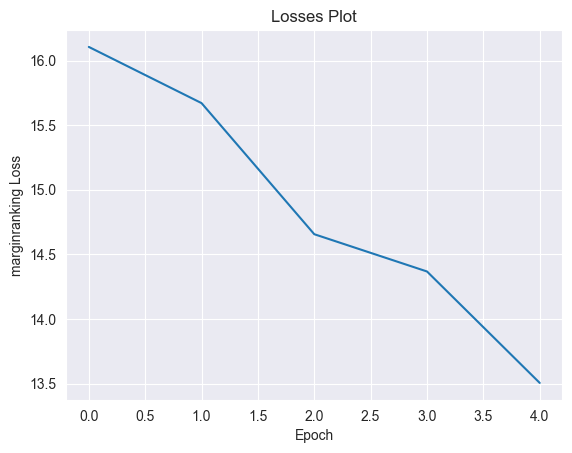

In [83]:
# wee need the pipeline to run a model, so it is simpler to import it directly.
# Pykeen lets you train a model with the minimal amount of custom parameters

from pykeen.pipeline import pipeline

# here we don't import the model, but let PyKEEN do the importing.
pipeline_result_simple = pipeline(
    random_seed=0,
    model='ComplEx',
    training=got_training,
    testing=got_testing,
)
pipeline_result_simple.plot_losses()

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/227 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.25s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

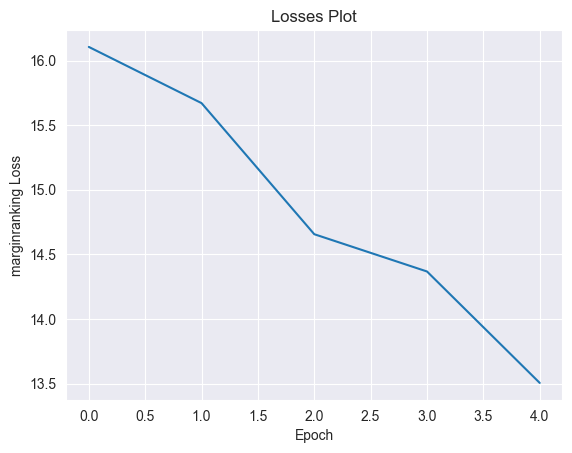

In [84]:
# here we import the model and use it directly.
from pykeen.models import ComplEx

pipeline_result_imported = pipeline(
    random_seed=0,
    model=ComplEx,
    training=got_training,
    testing=got_testing,
)
pipeline_result_imported.plot_losses()

In [85]:
print(pipeline_result_imported.get_metric('mrr'))
print(pipeline_result_simple.get_metric('mrr'))

0.0023511433973908424
0.0023511433973908424


In [86]:
# but to get a better performing model, you want to set different things
pipeline_result = pipeline(
    random_seed=0,
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    epochs=200,
    dimensions=150,
    optimizer='adam',
    optimizer_kwargs={'lr':1e-3},
    loss='pairwisehinge', 
    regularizer='LP', 
    regularizer_kwargs={'p':3, 'weight':1e-5}, 
)
print(pipeline_result.get_metric('mrr'))

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/227 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.27s seconds


0.00238585053011775


In [88]:
pipeline_result = pipeline(
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    training_kwargs=dict(
        num_epochs=200,
        checkpoint_name='got_complex_checkpointFinal.pt',
        checkpoint_directory='checkpoint_dir/',
        checkpoint_frequency=20,
    ),
    dimensions=150,
    optimizer='adam',
    optimizer_kwargs={'lr':1e-3},
    loss='pairwisehinge', 
    regularizer='LP', 
    regularizer_kwargs={'p':3, 'weight':1e-5}, 
    negative_sampler='basic',
    negative_sampler_kwargs=dict(
        filtered=True,
    )
)

INFO:pykeen.pipeline.api:=> no training loop checkpoint file found at 'checkpoint_dir/got_complex_checkpointFinal.pt'. Creating a new file.
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.training.training_loop:=> no checkpoint found at 'checkpoint_dir/got_complex_checkpointFinal.pt'. Creating a new file.


Training epochs on cpu:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 200.


Evaluating on cpu:   0%|          | 0.00/227 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.26s seconds


In [89]:
pipeline_result.get_metric('hits_at_10')

0.0

In [90]:
 # from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mrr = pipeline_result.get_metric('mrr')
print("MRR: %.4f" % (mrr))
print()

hits_10 = pipeline_result.get_metric('hits_at_10')
print("Hits@10: %.6f" % (hits_10))
print("Interpretation: on average, the model guessed the correct subject or object %.1f%% of the time when considering the top-10 better ranked triples.\n" % (hits_10*100))

hits_3 = pipeline_result.get_metric('hits_at_3')
print("Hits@3: %.6f" % (hits_3))
print("Interpretation: on average, the model guessed the correct subject or object %.1f%% of the time when considering the top-3 better ranked triples.\n" % (hits_3*100))

# hits_1 = hits_at_n_score(ranks, n=1)
# print("Hits@1: %.2f" % (hits_1))
# print("Interpretation: on average, the model guessed the correct subject or object %.1f%% of the time when considering the top-1 better ranked triples.\n" % (hits_1*100))


MRR: 0.0020

Hits@10: 0.000000
Interpretation: on average, the model guessed the correct subject or object 0.0% of the time when considering the top-10 better ranked triples.

Hits@3: 0.000000
Interpretation: on average, the model guessed the correct subject or object 0.0% of the time when considering the top-3 better ranked triples.



## Link prediction

In [98]:
candidate_triples = [
    ("http://webprotege.stanford.edu/R8IHt3CvDHikYNL3A5kSo7s",  # Scenario_QA_Assistance
     "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasEthicalConsideration",
     "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Transparency"),
    
    ("http://webprotege.stanford.edu/RDlZ99er5HWh5NUCG0dB5nk",  # Scenario_HabitFormation
     "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasEthicalConsideration",
     "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Trust"),
    
    ("http://webprotege.stanford.edu/R8PtgDIh3PhF7UVyyhlTnpW",  # Scenario_TrustCalibration
     "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasProcessingTask",
     "http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Negotiation"),
]


In [99]:
model = pipeline_result.model
entity_to_id = pipeline_result.training.entity_to_id
relation_to_id = pipeline_result.training.relation_to_id


In [100]:
import torch

def score_triples(triples, model, entity_to_id, relation_to_id):
    scores = []

    for h, r, t in triples:
        if h in entity_to_id and r in relation_to_id and t in entity_to_id:
            h_id = torch.tensor([entity_to_id[h]])
            r_id = torch.tensor([relation_to_id[r]])
            t_id = torch.tensor([entity_to_id[t]])

            score = model.score_hrt(torch.stack([h_id, r_id, t_id], dim=1)).item()
            scores.append(((h, r, t), score))
        else:
            scores.append(((h, r, t), None))  # in case of unknown URI

    return sorted(scores, key=lambda x: x[1] if x[1] is not None else -float('inf'), reverse=True)


In [101]:
scored = score_triples(candidate_triples, model, entity_to_id, relation_to_id)

print("📈 Link Prediction Scores:")
for (h, r, t), score in scored:
    print(f"{h} -- {r} --> {t} => Score: {score}")


📈 Link Prediction Scores:
http://webprotege.stanford.edu/RDlZ99er5HWh5NUCG0dB5nk -- http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasEthicalConsideration --> http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Trust => Score: 39.87575912475586
http://webprotege.stanford.edu/R8IHt3CvDHikYNL3A5kSo7s -- http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasEthicalConsideration --> http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Transparency => Score: -9.102727890014648
http://webprotege.stanford.edu/R8PtgDIh3PhF7UVyyhlTnpW -- http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/hasProcessingTask --> http://www.semanticweb.org/vbr240/ontologies/2022/4/untitled-ontology-51/Negotiation => Score: None


In [108]:
pipeline_result = pipeline(
    model='ComplEx',
    training=got_training,
    testing=got_testing,
    training_kwargs=dict(
        num_epochs=200
    ),
    dimensions=150,
    optimizer='adam',
    optimizer_kwargs={'lr':1e-3},
    loss='pairwisehinge', 
    regularizer='LP', 
    regularizer_kwargs={'p':3, 'weight':1e-5}, 
    negative_sampler='basic',
    negative_sampler_kwargs=dict(
        filtered=True,
    ),
    result_tracker='tensorboard'
)

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/17 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/227 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.29s seconds
